In [5]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
from collections import Counter

df = pd.read_csv('data3.csv')
# df_abstract = pd.DataFrame(df['Abstract'])
nlp = spacy.load('en_core_web_sm')

# Keyword Word Frequency

In [8]:
# not token.is_stop and token.pos_ != 'VERB'
def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [str(token.text.lower()) for token in doc if token.pos_ != 'VERB']
    return keywords

keywords_array = []

# Similiar with Unigram
for _, row in df.iterrows():
    sentence = row['Word']
    keywords = extract_keywords(sentence)
    keywords_array.extend(keywords)

keywords_list = pd.DataFrame(list(set(keywords_array)))

display(keywords_list)

,0
0,feedstock
1,drives
2,ideas
3,wef
4,chemical
...,...
4165,measures
4166,west
4167,malaysia
4168,polycrystalline


In [12]:
import Levenshtein
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Levenshtein Distance
string1 = "kitten"
string2 = "sitting"
distance = Levenshtein.distance(string1, string2)
print(f"Levenshtein Distance between '{string1}' and '{string2}': {distance}")

# Cosine Similarity
documents = [
    "This is a sample document.",
    "Another document for testing.",
    "This is the third document."
]

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(documents)

# Compute cosine similarity between the first and second documents
cosine_sim = cosine_similarity(doc_term_matrix[0], doc_term_matrix[1])
print(f"Cosine Similarity between the first and second documents: {cosine_sim[0][0]}")


ModuleNotFoundError: No module named 'Levenshtein'

In [9]:
abstract_count = Counter(keywords_array)

result_dict = {key: abstract_count[key] for key in keywords_array if key in abstract_count}
sorted_result = dict(sorted(result_dict.items(), key=lambda item: (item[1], item[0])))

print(sorted_result)

{'abatement': 1, 'ability': 1, 'abiotic': 1, 'able': 1, 'above': 1, 'aboveground': 1, 'abr': 1, 'abroad': 1, 'absence': 1, 'absorption': 1, 'abundance': 1, 'abundant': 1, 'acacia': 1, 'academic': 1, 'academics': 1, 'academy': 1, 'acceleration': 1, 'acceptance': 1, 'access': 1, 'accordance': 1, 'account': 1, 'accounts': 1, 'accumulation': 1, 'accuracy': 1, 'accurate': 1, 'accurately': 1, 'aceh': 1, 'acid': 1, 'acidification': 1, 'acm': 1, 'acrs': 1, 'action': 1, 'actions': 1, 'active': 1, 'actively': 1, 'activists': 1, 'activity': 1, 'actor': 1, 'actors': 1, 'actual': 1, 'adaptation': 1, 'addition': 1, 'additional': 1, 'additionally': 1, 'address': 1, 'adequate': 1, 'adhesive': 1, 'adin': 1, 'adjacent': 1, 'adjustment': 1, 'administrative': 1, 'adoption': 1, 'advantage': 1, 'advantages': 1, 'adverse': 1, 'aeration': 1, 'aerenchyma': 1, 'aerial': 1, 'aerosols': 1, 'africa': 1, 'african': 1, 'after': 1, 'against': 1, 'agb': 1, 'agc': 1, 'age': 1, 'agencies': 1, 'agency': 1, 'agenda': 1, '

In [10]:
df = pd.DataFrame(list(sorted_result.items()), columns=['Word', 'Counts'])
# Save DataFrame to a CSV file
csv_file_path = 'data3-1.csv'
df.to_csv(csv_file_path, index=False)

In [16]:
result_dict

{'pandemic': 8,
 'altered': 5,
 'course': 4,
 'economy': 37,
 'world': 56,
 'including': 70,
 'indonesia': 522,
 'government': 79,
 'policy': 74,
 'resort': 1,
 'social': 22,
 'restriction': 1,
 'working': 1,
 'home': 3,
 'increased': 53,
 'household': 14,
 'consumption': 106,
 'energy': 429,
 'reduce': 130,
 'commercial': 14,
 'use': 204,
 'economic': 101,
 'growth': 60,
 'greatly': 8,
 'affected': 21,
 'surged': 1,
 'second': 29,
 'wave': 1,
 'strikes': 1,
 'long': 52,
 'term': 46,
 'electricity': 94,
 'expected': 27,
 'recover': 1,
 'recent': 15,
 'plan': 17,
 'phase': 11,
 'coal': 78,
 'generation': 66,
 'sector': 95,
 'provided': 15,
 'pathway': 8,
 'new': 48,
 'renewable': 125,
 'nre': 7,
 'providing': 8,
 'environmentally': 17,
 'friendly': 17,
 'support': 36,
 'reduction': 94,
 'greenhouse': 383,
 'gas': 373,
 'ghg': 319,
 'emissions': 679,
 'demand': 58,
 'supply': 64,
 'analysis': 107,
 'performed': 18,
 'leap': 2,
 'result': 78,
 'demonstrated': 8,
 'utilization': 40,
 'emis

In [5]:
top20 = dict(abstract_count.most_common(20))
top20_dict = dict(sorted(top20.items(), key=lambda item: (item[1], item[0])))
print(top20_dict)

{'results': 194, 'forest': 195, 'use': 204, 'global': 208, 'land': 214, 'change': 217, 'environmental': 219, 'climate': 233, 'production': 236, 'palm': 257, 'oil': 286, 'emission': 303, 'carbon': 318, 'ghg': 319, 'study': 352, 'gas': 373, 'greenhouse': 383, 'energy': 429, 'indonesia': 522, 'emissions': 679}


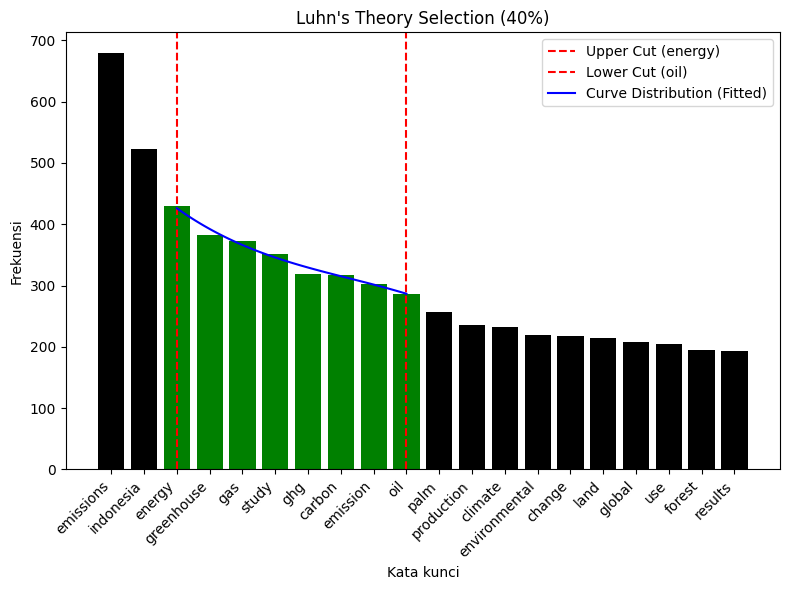

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

word_frequencies = {
    'emissions': 679, 'indonesia': 522, 'energy': 429, 'greenhouse': 383,
    'gas': 373, 'study': 352, 'ghg': 319, 'carbon': 318, 'emission': 303,
    'oil': 286, 'palm': 257, 'production': 236, 'climate': 233, 'environmental': 219,
    'change': 217, 'land': 214, 'global': 208, 'use': 204, 'forest': 195, 'results': 194
}

sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

words = list(sorted_word_frequencies.keys())
frequencies = list(sorted_word_frequencies.values())

energy_index = words.index('energy')
oil_index = words.index('oil')

x_vals = np.array(range(energy_index, oil_index + 1))
y_vals = np.array(frequencies[energy_index:oil_index + 1])

def polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt, _ = curve_fit(polynomial, x_vals, y_vals)
y_fit = polynomial(x_vals, *popt)
fig, ax = plt.subplots(figsize=(8, 6))

colors = ['black'] * len(words)
for i in range(energy_index, oil_index + 1):
    colors[i] = 'green'
ax.bar(words, frequencies, color=colors)

ax.set_xlabel('Kata kunci')
ax.set_ylabel('Frekuensi')
ax.set_title('Luhn\'s Theory Selection (40%)')
ax.axvline(x='energy', color='red', linestyle='--', label='Upper Cut (energy)')
ax.axvline(x='oil', color='red', linestyle='--', label='Lower Cut (oil)')
x_interp = np.linspace(energy_index, oil_index, 100)
y_interp = polynomial(x_interp, *popt)
ax.plot(x_interp, y_interp, color='blue', label='Curve Distribution (Fitted)')
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


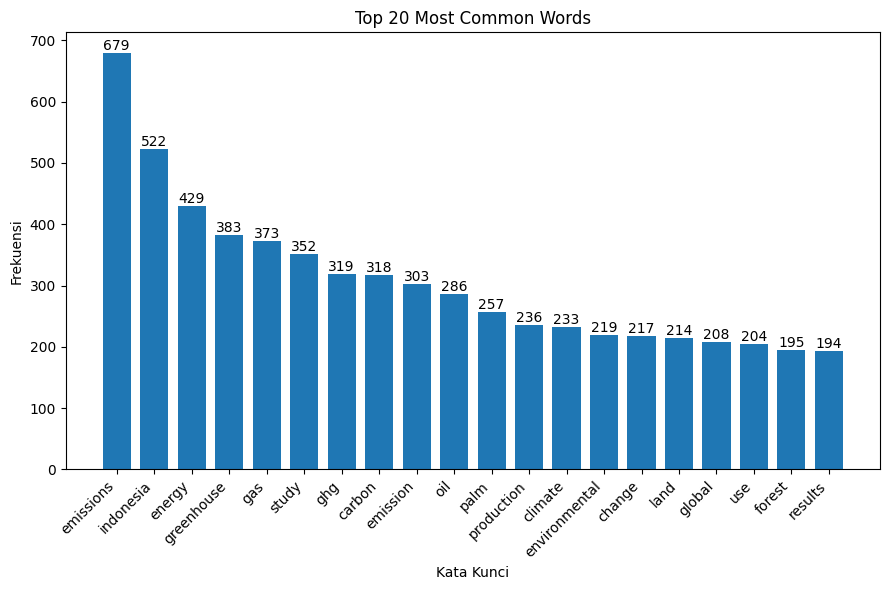

In [7]:
import matplotlib.pyplot as plt

data = {k: v for k, v in sorted(top20_dict.items(), key=lambda item: item[1], reverse=True)}

labels = list(data.keys())
values = list(data.values())

# Adjust the figure size and spacing between bars
plt.figure(figsize=(9, 6))
plt.bar(labels, values, width=0.75, align='center')

# Add text labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.ylabel('Frekuensi')
plt.xlabel('Kata Kunci')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words')

plt.tight_layout()  # To avoid overlapping labels
plt.show()


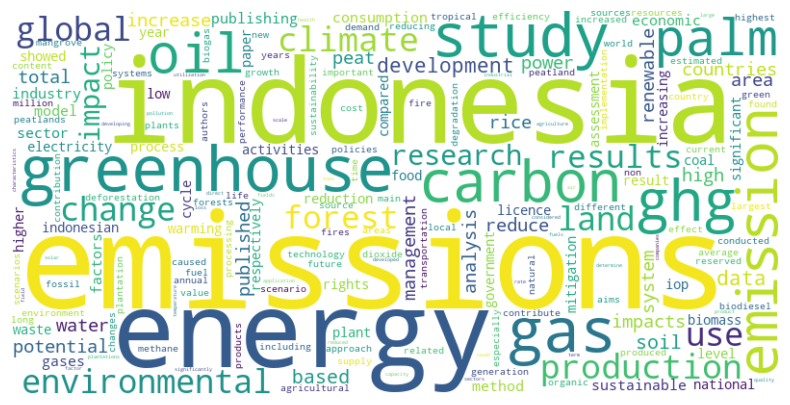

In [8]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_result)
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


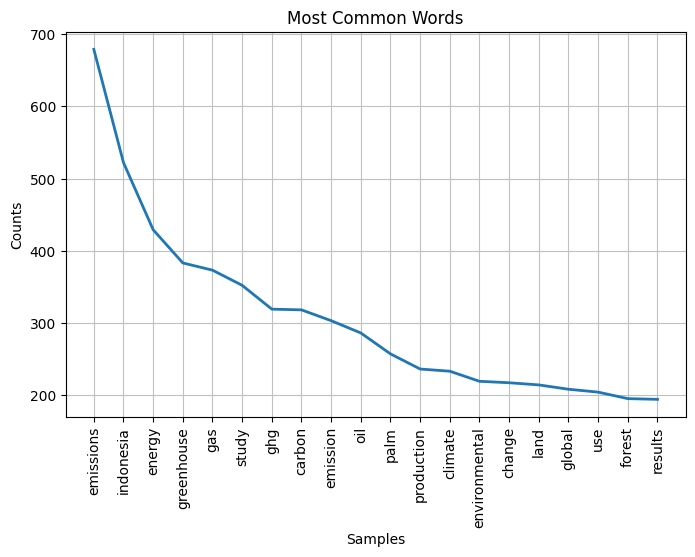

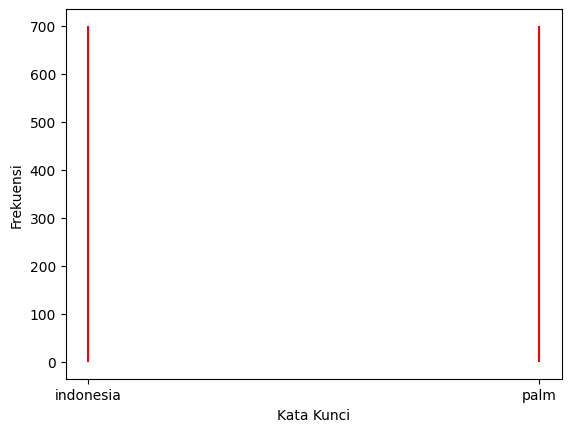

In [9]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Sample text data
text_data = """
Qualitative analysis is a method for examining non-numeric data 
to understand and interpret patterns and themes. It involves the 
study of texts, interviews, observations, and other qualitative 
sources to gain insights into human experiences and behaviors. 
Thematic analysis is a popular approach in qualitative research, 
where researchers identify and analyze themes or patterns within 
the data. The process involves reading and rereading the text, 
coding segments into themes, and interpreting the findings to 
develop meaningful insights.
"""

# Tokenize the text and remove stopwords
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Calculate word frequency distribution
fdist = FreqDist(keywords_array)

# Plot the most common words
plt.figure(figsize=(8, 5))
fdist.plot(20, title='Most Common Words')
plt.ylabel('Frekuensi')
plt.xlabel('Kata Kunci')
plt.vlines(x = ['indonesia', 'palm'], ymin=0, ymax=700, color = 'r', label = 'upper and lower cut')
plt.show()


In [10]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
text_list = ['energy', 'greenhouse','gas','study', 'ghg', 'carbon', 'emission', 'oil']

# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

print(np.array(text_list).ndim)

1
